In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [2]:
# Reading the dataset and store it in dataframe
df=pd.read_csv("Leads.csv")

In [3]:
# Finding the number of rows and columns
df.shape

(9240, 37)

In [4]:
# Checking the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### DATA CLEANING

In [6]:
# There are various select in the dataset which can be considered as null values so replacing select to Null
df=df.replace("Select", np.nan)

In [7]:
# Finding the missing value percentage
data= pd.DataFrame()
data["null_sum"] = df.isna().sum()
data["missing_percentage"] = (data["null_sum"]*100)/df.shape[0]
data.index.name = "Columns"
data.reset_index(level=0, inplace=True)
data.sort_values(by="missing_percentage",ascending = False)

,Columns,null_sum,missing_percentage
13,How did you hear about X Education,7250,78.463203
28,Lead Profile,6855,74.188312
25,Lead Quality,4767,51.590909
33,Asymmetrique Profile Score,4218,45.649351
32,Asymmetrique Activity Score,4218,45.649351
30,Asymmetrique Activity Index,4218,45.649351
31,Asymmetrique Profile Index,4218,45.649351
29,City,3669,39.707792
12,Specialization,3380,36.580087
24,Tags,3353,36.287879


In [8]:
# Removing columns hving more than 45% of missing values
df=df[data["Columns"][data["missing_percentage"]<45]]

In [9]:
df.shape

(9240, 30)

In [10]:
# Checking the number of unique values
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [11]:
# There are some columns having only one kind of value which won't be helping us, so removing those as well
one_unique=["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","What matters most to you in choosing a course","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"]
df=df.drop(one_unique,axis=1)

In [12]:
df.shape

(9240, 18)

In [13]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [14]:
# Dropping Prospect ID and Lead number 
df.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)

In [15]:
df.shape

(9240, 16)

In [16]:
# Checking the sum of null values
df.isna().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
Specialization                            3380
What is your current occupation           2690
Tags                                      3353
City                                      3669
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [17]:
# Checking the different values of Tags
df["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [18]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

In [19]:
# Filling Null values of Tags column to Unknown
df.Tags.fillna("Unknown", inplace=True)

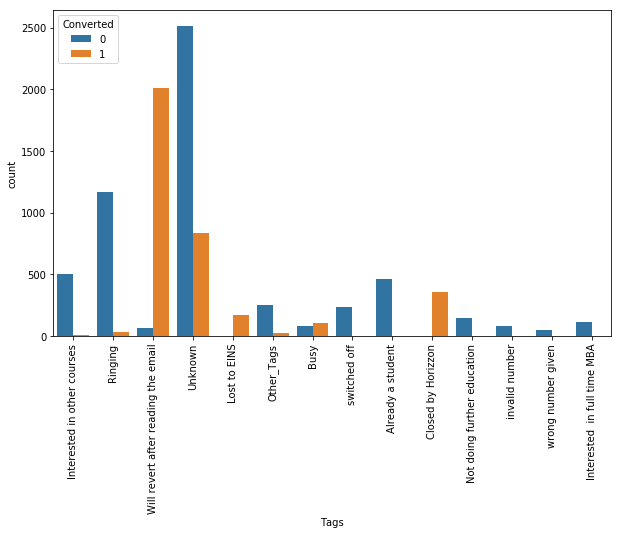

In [20]:
plt.figure(figsize = (10,6))
sns.countplot(df.Tags, hue = df.Converted)
plt.xticks(rotation=90)
plt.show()

"Will revert after reading the email" have the higher number of conversion and those who won't pick up calls have higher number of people who don't convert.

In [21]:
df.Tags.isna().sum()

0

In [22]:
# Checking the values of Specialization column
df["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [23]:
# Replacing null values with unknown
df.Specialization.fillna("Unknown", inplace=True)

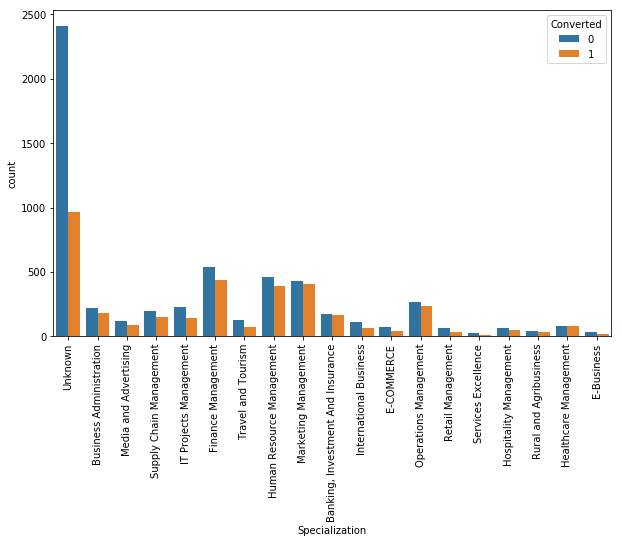

In [24]:
plt.figure(figsize = (10,6))
sns.countplot(df.Specialization, hue = df.Converted)
plt.xticks(rotation=90)
plt.show()

In [25]:
# Checking the values of City column
df["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [26]:
# Filling null values with Unknown
df.City.fillna("Unknown", inplace=True)

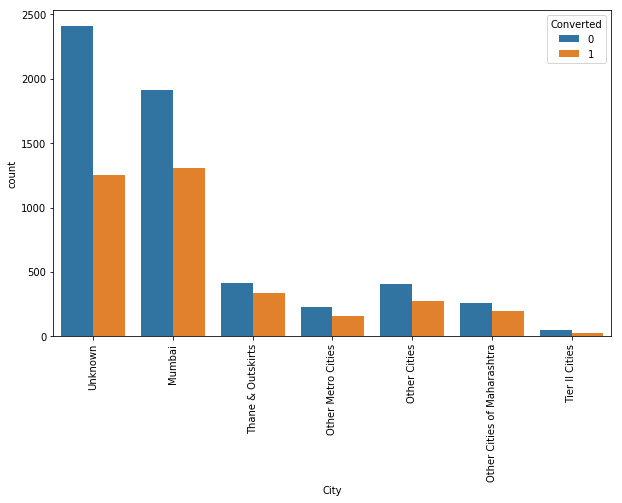

In [27]:
plt.figure(figsize = (10,6))
sns.countplot(df.City, hue = df.Converted)
plt.xticks(rotation=90)
plt.show()

In [28]:
# missing value treatment and replacing some values for lead source column
df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
youtubechannel          1
testone                 1
blog                    1
NC_EDM                  1
WeLearn                 1
Name: Lead Source, dtype: int64

In [29]:
def f(x):
    if x in ["Google","Direct Traffic","Olark Chat","Organic Search","Reference","Welingak Website","Referral Sites","Facebook"]:
        return x
    else:
        return("Other sources")


df["Lead Source"]=df["Lead Source"].apply(f)

In [30]:
df["Lead Source"].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other sources         64
Facebook              55
Name: Lead Source, dtype: int64

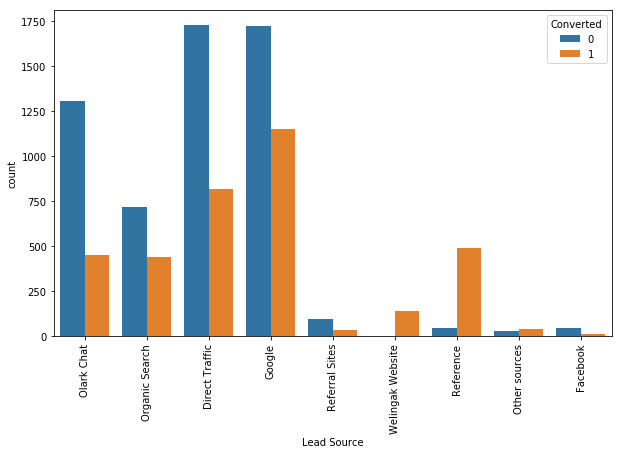

In [35]:
plt.figure(figsize = (10,6))
sns.countplot(df["Lead Source"], hue = df.Converted)
plt.xticks(rotation=90)
plt.show()

In [36]:
# 
df["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

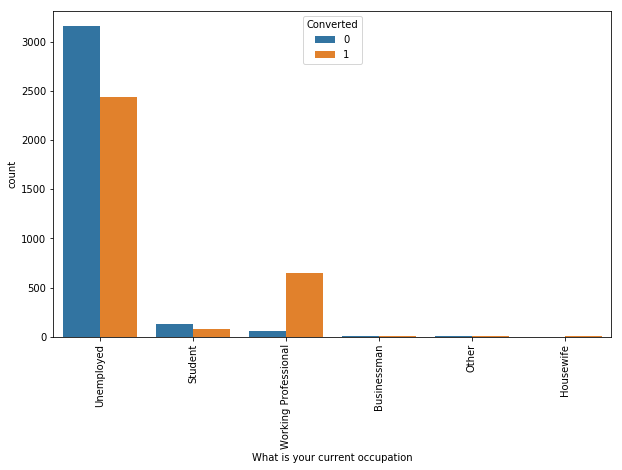

In [37]:
plt.figure(figsize = (10,6))
sns.countplot(df["What is your current occupation"], hue = df.Converted)
plt.xticks(rotation=90)
plt.show()

In [38]:
def f1(x):
    if x in ["Unemployed","Working Professional","Student","Other","Housewife","Businessman"]:
        return x
    else:
        return("Unknown")

df["What is your current occupation"]=df["What is your current occupation"].apply(f1)
df.rename(columns={"What is your current occupation":"Occupation"}, inplace=True)

In [39]:
#  missing value treatment for country

In [40]:
df["Country"]= df.Country.fillna("Unknown")

In [136]:
def f2(x):
    if x== "India" or x=="Unknown":
        return x
    else:
        return("Non India")

df["Country"]=df["Country"].apply(f2)


KeyError: 'Country'

In [43]:
df["Country"].value_counts()

India        6492
Unknown      2461
Non India     287
Name: Country, dtype: int64

In [135]:
plt.figure(figsize = (10,6))
sns.countplot(df.Country, hue = df.Converted)
plt.xticks(rotation=90)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Country'

<Figure size 720x432 with 0 Axes>

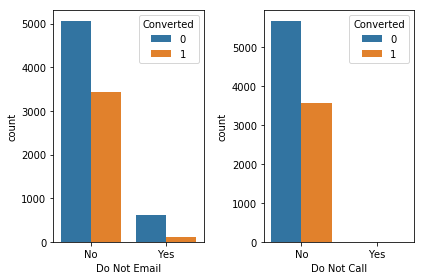

In [44]:
plt.subplot(1, 2, 1)
sns.countplot(df['Do Not Email'], hue = df.Converted)
plt.subplot(1, 2, 2)
sns.countplot(df['Do Not Call'], hue = df.Converted)
plt.tight_layout()
plt.show()

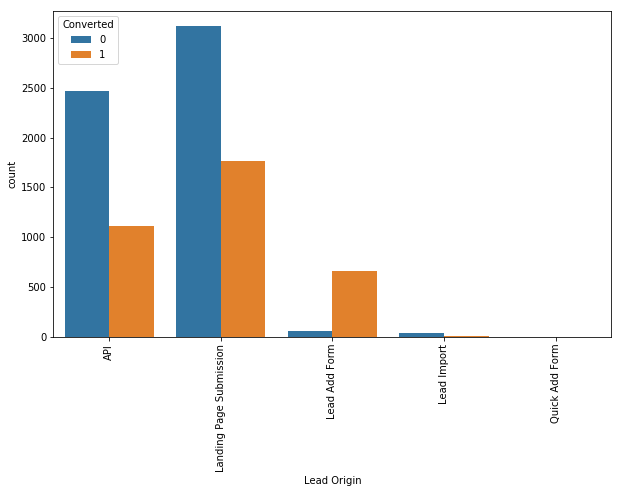

In [45]:
plt.figure(figsize = (10,6))
sns.countplot(df["Lead Origin"], hue = df.Converted)
plt.xticks(rotation=90)
plt.show()

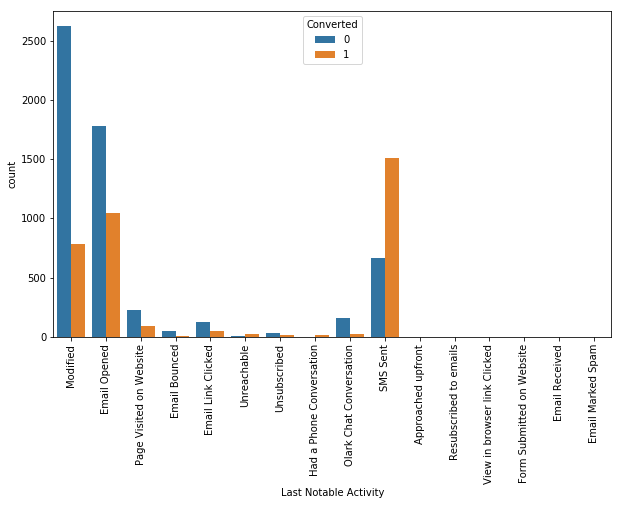

In [46]:
plt.figure(figsize = (10,6))
sns.countplot(df["Last Notable Activity"], hue = df.Converted)
plt.xticks(rotation=90)
plt.show()

In [47]:
#outlier check

outlier = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
outlier.describe(percentiles=[0.25,0.5,0.75,0.9,0.92,0.94,0.95,0.97,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
92%,8.000000,1449.880000,5.000000
94%,9.000000,1521.660000,6.000000


In [48]:
df.TotalVisits.median()

3.0

In [49]:
df.TotalVisits.fillna(df.TotalVisits.median(),inplace=True)

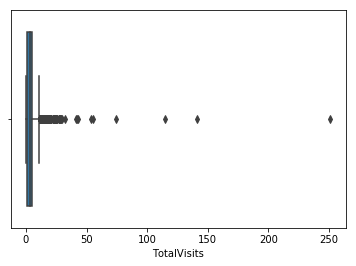

In [50]:
#checking outliers for totalvisits
sns.boxplot(df['TotalVisits'])

In [51]:
#upper whisker - capping outliers using upper whisker
whisker = df.TotalVisits.quantile(0.75) + 1.5* (df.TotalVisits.quantile(0.75) - df.TotalVisits.quantile(0.25))

In [52]:
df[(df["TotalVisits"]>whisker)]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
56,Landing Page Submission,Referral Sites,No,No,1,13.0,436,13.00,Form Submitted on Website,India,IT Projects Management,Unemployed,Busy,Other Metro Cities,No,Modified
58,Landing Page Submission,Organic Search,No,No,0,17.0,409,8.50,Email Opened,India,Human Resource Management,Unemployed,Interested in other courses,Mumbai,Yes,Modified
102,Landing Page Submission,Google,No,No,0,12.0,809,4.00,Unreachable,India,Finance Management,Unknown,Unknown,Mumbai,No,Modified
125,API,Referral Sites,No,No,0,16.0,53,16.00,Olark Chat Conversation,India,Unknown,Unknown,Unknown,Unknown,No,Modified
168,Landing Page Submission,Referral Sites,No,No,0,12.0,493,12.00,Email Link Clicked,India,Marketing Management,Unknown,Unknown,Thane & Outskirts,Yes,Email Link Clicked
188,Landing Page Submission,Organic Search,No,No,1,12.0,1411,6.00,Email Opened,India,Finance Management,Unemployed,Will revert after reading the email,Other Cities,Yes,Email Opened
191,API,Google,No,No,0,12.0,68,1.71,Page Visited on Website,India,Media and Advertising,Unknown,Unknown,Mumbai,No,Modified
229,API,Organic Search,No,No,0,13.0,54,6.50,Email Opened,India,Unknown,Unemployed,Ringing,Unknown,No,Email Opened
235,Landing Page Submission,Organic Search,No,No,0,12.0,28,6.00,Email Opened,India,International Business,Unemployed,Interested in other courses,Other Cities,Yes,Email Opened
244,API,Organic Search,No,No,0,13.0,594,4.33,Had a Phone Conversation,India,Unknown,Unemployed,Ringing,Unknown,No,Modified


In [53]:
#capping & flooring the outliers

def totalvisit_outlier(x):
    if x>= whisker:
        return whisker
    else:
        return x

df["TotalVisits"]=df["TotalVisits"].apply(totalvisit_outlier)

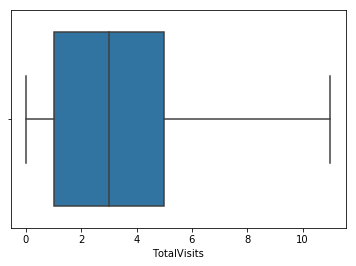

In [54]:
#checking outliers
sns.boxplot(df['TotalVisits'])

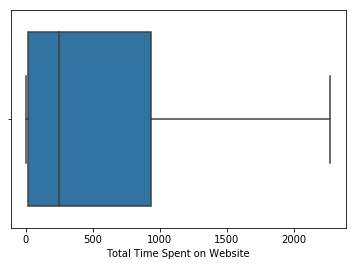

In [55]:
#checking outliers for Total Time Spent on Website
sns.boxplot(df["Total Time Spent on Website"])

no outliers oserved in total time spend on website

In [56]:
df.isna().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
Country                                     0
Specialization                              0
Occupation                                  0
Tags                                        0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [57]:
df["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [58]:
activity_attributes=['Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam']

In [59]:
def activity(x):
    if x in activity_attributes:
        return("Other Activity")
    else:
        return x

df["Last Activity"]=df["Last Activity"].apply(activity)


In [60]:
df["Last Activity"]=df["Last Activity"].replace(np.NaN,"Other Activity")

In [61]:
df.isna().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                               0
Country                                     0
Specialization                              0
Occupation                                  0
Tags                                        0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

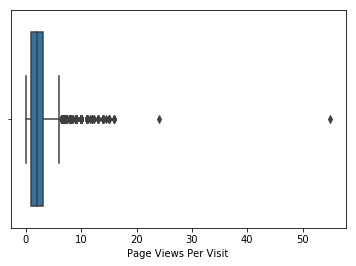

In [62]:
sns.boxplot(df["Page Views Per Visit"])

In [63]:
upperwhisker = df["Page Views Per Visit"].quantile(0.75) + 1.5* (df["Page Views Per Visit"].quantile(0.75) - df["Page Views Per Visit"].quantile(0.25))

In [64]:
df[(df["Page Views Per Visit"]>upperwhisker)]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
10,Landing Page Submission,Organic Search,No,No,1,8.0,1351,8.0,Email Opened,India,Travel and Tourism,Unemployed,Will revert after reading the email,Other Metro Cities,Yes,Email Opened
12,API,Organic Search,No,No,1,11.0,1538,11.0,Email Opened,India,Marketing Management,Unemployed,Will revert after reading the email,Unknown,No,Modified
41,Landing Page Submission,Organic Search,Yes,No,0,7.0,38,7.0,Unsubscribed,India,Retail Management,Unemployed,Busy,Mumbai,Yes,Unsubscribed
56,Landing Page Submission,Referral Sites,No,No,1,11.0,436,13.0,Form Submitted on Website,India,IT Projects Management,Unemployed,Busy,Other Metro Cities,No,Modified
57,API,Referral Sites,No,No,1,8.0,903,8.0,Page Visited on Website,India,Finance Management,Unemployed,Will revert after reading the email,Other Cities of Maharashtra,No,Page Visited on Website
58,Landing Page Submission,Organic Search,No,No,0,11.0,409,8.5,Email Opened,India,Human Resource Management,Unemployed,Interested in other courses,Mumbai,Yes,Modified
125,API,Referral Sites,No,No,0,11.0,53,16.0,Olark Chat Conversation,India,Unknown,Unknown,Unknown,Unknown,No,Modified
168,Landing Page Submission,Referral Sites,No,No,0,11.0,493,12.0,Email Link Clicked,India,Marketing Management,Unknown,Unknown,Thane & Outskirts,Yes,Email Link Clicked
172,API,Organic Search,No,No,0,7.0,1334,7.0,Email Opened,India,Business Administration,Unknown,Interested in other courses,Mumbai,Yes,Modified
173,API,Google,No,No,0,7.0,615,7.0,Form Submitted on Website,India,"Banking, Investment And Insurance",Unknown,Interested in other courses,Thane & Outskirts,No,Modified


In [65]:
def funct(x):
    if x>= upperwhisker:
        return upperwhisker
    else:
        return x

df["Page Views Per Visit"]=df["Page Views Per Visit"].apply(funct)

In [66]:
#outlier treatment is done now will fill na missing values with median for Page Views Per Visit

In [67]:
k=df["Page Views Per Visit"].median()
df["Page Views Per Visit"].fillna(k,inplace=True)

In [68]:
#checking the outliers 
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Country                                   0
Specialization                            0
Occupation                                0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

## step 3: Data preprocessing

1) Dummy Variables
2) train test split
3) normalisation

In [69]:
df.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unemployed,Interested in other courses,Unknown,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Ringing,Unknown,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [70]:
varlist=[["Do Not Email","Do Not Call","A free copy of Mastering The Interview"]]

In [71]:
df["Do Not Email"] = df["Do Not Email"].apply(lambda x: 1 if x=="Yes" else 0)
df["Do Not Call"] = df["Do Not Call"].apply(lambda x: 1 if x=="Yes" else 0)
df["A free copy of Mastering The Interview"] = df["A free copy of Mastering The Interview"].apply(lambda x: 1 if x=="Yes" else 0)

In [72]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', "Country",'Occupation','Last Notable Activity','Tags','Specialization','City']],drop_first=True)
df=pd.concat([df,dummy1],axis=1)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 98 columns):
Lead Origin                                           9240 non-null object
Lead Source                                           9240 non-null object
Do Not Email                                          9240 non-null int64
Do Not Call                                           9240 non-null int64
Converted                                             9240 non-null int64
TotalVisits                                           9240 non-null float64
Total Time Spent on Website                           9240 non-null int64
Page Views Per Visit                                  9240 non-null float64
Last Activity                                         9240 non-null object
Country                                               9240 non-null object
Specialization                                        9240 non-null object
Occupation                                            9240 non-null ob

In [74]:
df["Last Notable Activity"].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Approached upfront                 1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [75]:
drop_dummy=['Lead Origin', 'Lead Source', 'Last Activity', "Country",'Occupation','Last Notable Activity','Tags','Specialization','City']

In [76]:
df.drop(drop_dummy,axis=1,inplace=True)

In [77]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [78]:
X=df.drop("Converted",axis=1)
Y=df["Converted"]

In [79]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=42)

In [80]:
scaler=MinMaxScaler()

In [81]:
numerical_variables=["TotalVisits","Total Time Spent on Website", "Page Views Per Visit"]

In [82]:
X_train[numerical_variables]= scaler.fit_transform(X_train[numerical_variables])

In [83]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
4715,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7132,0,0,0.181818,0.549296,0.166667,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
8954,0,0,0.363636,0.170335,0.221667,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5283,1,0,1.000000,0.532130,1.000000,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3003,0,0,0.272727,0.595951,0.500000,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


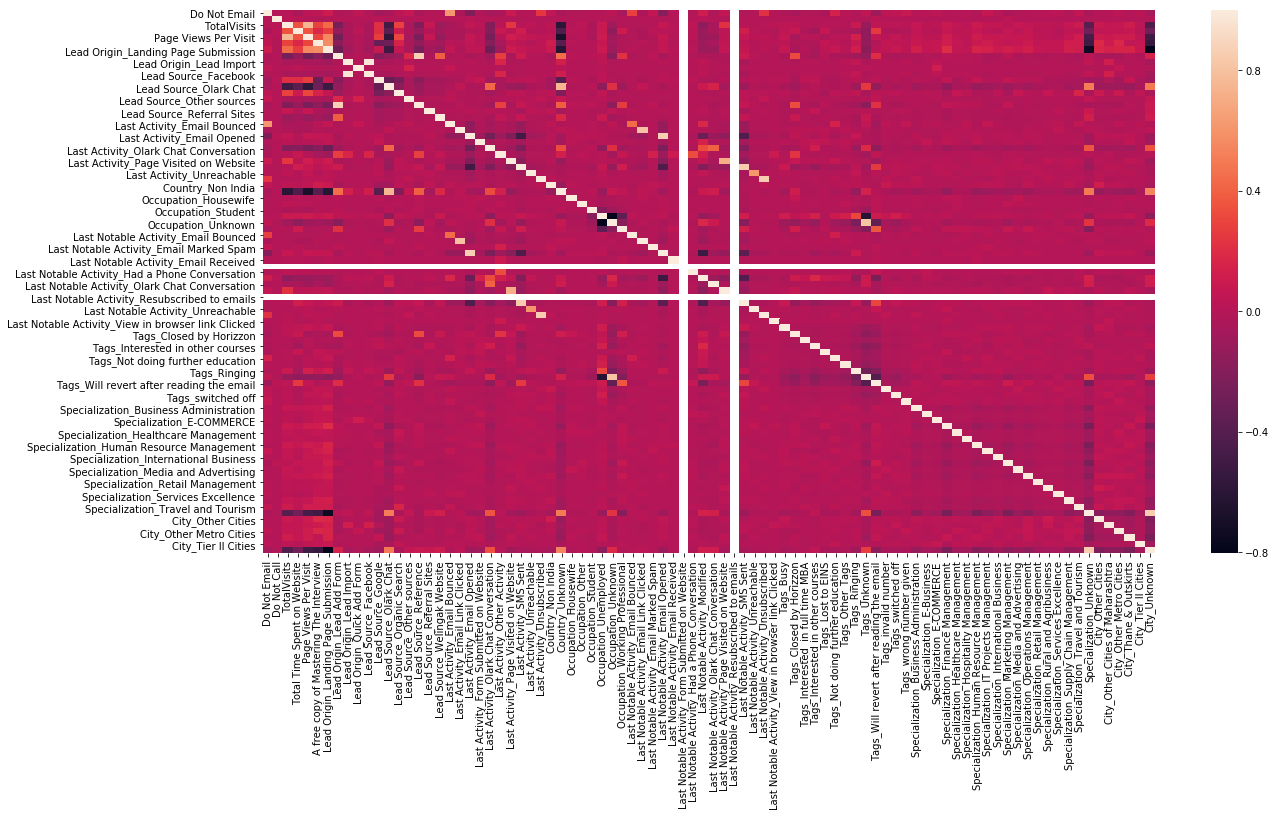

In [84]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr())
plt.show()

In [85]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
4715,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7132,0,0,0.181818,0.549296,0.166667,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
8954,0,0,0.363636,0.170335,0.221667,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5283,1,0,1.000000,0.532130,1.000000,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3003,0,0,0.272727,0.595951,0.500000,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
logreg = LogisticRegression()

In [87]:
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, Y_train)

In [88]:
col = X_train.columns[rfe.support_]

In [89]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other sources',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Country_Non India', 'Country_Unknown',
       'Occupation_Housewife', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',


In [90]:
X_train_sm=X_train[col]

In [91]:
model1 = sm.GLM(Y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1141.2
Date:                Sun, 12 Jun 2022   Deviance:                       2282.4
Time:                        14:59:27   Pearson chi2:                 1.08e+04
No. Iterations:                    24   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.0786      0.212    -19.271      0.000      -4.493      -3.664
Total Time Spent on Website                       3.5260      0.231     15.242      0.000       3.073       3.979
Lead Source_Welingak Website                     24.4526   2.12e+04      0.001      0.999   -4.15e+04    4.16e+04
Last Activity_SMS Sent                            2.1221      0.126     16.854      0.000       1.875       2.369
Occupation_Unknown                               -2.6452      0.155    -17.031      0.000      -2.950      -2.341
Last Notable Activity_Modified                   -1.4959      0.128    -11.652      0.000      -1.747      -1.244
Last Notable Activity_Olark Chat Conversation    -1.9096      0.491     -3.886      0.000      -2.873      -0.946
Tags_Busy                                         2.3328      0.289      8.078      0.000       1.767       2.899
Tags_Closed by Horizzon                           9.1228      0.746     12.225      0.000       7.660      10.585
Tags_Lost to EINS                                 9.3096      0.669     13.922      0.000       7.999      10.620
Tags_Ringing                                     -1.4277      0.293     -4.870      0.000      -2.002      -0.853
Tags_Unknown                                      3.8056      0.230     16.557      0.000       3.355       4.256
Tags_Will revert after reading the email          6.5575      0.254     25.850      0.000       6.060       7.055
Tags_invalid number                              -2.0947      1.115     -1.879      0.060      -4.279       0.090
Tags_switched off                                -2.4697      0.752     -3.285      0.001      -3.943      -0.996
Tags_wrong number given                         -23.4386   3.12e+04     -0.001      0.999   -6.12e+04    6.11e+04
=================================================================================================================
"""

In [92]:
X_train_sm.drop("Lead Source_Welingak Website",axis=1,inplace=True)

In [93]:
model2 = sm.GLM(Y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1162.8
Date:                Sun, 12 Jun 2022   Deviance:                       2325.6
Time:                        14:59:27   Pearson chi2:                 1.16e+04
No. Iterations:                    22   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.0477      0.211    -19.181      0.000      -4.461      -3.634
Total Time Spent on Website                       3.4273      0.231     14.810      0.000       2.974       3.881
Last Activity_SMS Sent                            2.1555      0.125     17.273      0.000       1.911       2.400
Occupation_Unknown                               -2.8685      0.152    -18.921      0.000      -3.166      -2.571
Last Notable Activity_Modified                   -1.5191      0.127    -11.965      0.000      -1.768      -1.270
Last Notable Activity_Olark Chat Conversation    -2.0172      0.490     -4.115      0.000      -2.978      -1.056
Tags_Busy                                         2.3131      0.289      8.009      0.000       1.747       2.879
Tags_Closed by Horizzon                           9.1938      0.746     12.328      0.000       7.732      10.655
Tags_Lost to EINS                                 9.5050      0.671     14.167      0.000       8.190      10.820
Tags_Ringing                                     -1.4496      0.293     -4.949      0.000      -2.024      -0.876
Tags_Unknown                                      4.0163      0.228     17.645      0.000       3.570       4.462
Tags_Will revert after reading the email          6.5604      0.254     25.874      0.000       6.063       7.057
Tags_invalid number                              -2.1092      1.109     -1.901      0.057      -4.284       0.065
Tags_switched off                                -2.4924      0.751     -3.317      0.001      -3.965      -1.020
Tags_wrong number given                         -21.4605   1.15e+04     -0.002      0.999   -2.25e+04    2.25e+04
=================================================================================================================
"""

In [94]:
X_train_sm.drop("Tags_wrong number given",axis=1,inplace=True)

In [95]:
model3 = sm.GLM(Y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
model3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1167.3
Date:                Sun, 12 Jun 2022   Deviance:                       2334.6
Time:                        14:59:27   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.1795      0.212    -19.731      0.000      -4.595      -3.764
Total Time Spent on Website                       3.4280      0.231     14.821      0.000       2.975       3.881
Last Activity_SMS Sent                            2.1251      0.124     17.184      0.000       1.883       2.367
Occupation_Unknown                               -2.8597      0.151    -18.933      0.000      -3.156      -2.564
Last Notable Activity_Modified                   -1.5054      0.127    -11.866      0.000      -1.754      -1.257
Last Notable Activity_Olark Chat Conversation    -2.0166      0.490     -4.113      0.000      -2.977      -1.056
Tags_Busy                                         2.4596      0.287      8.563      0.000       1.897       3.023
Tags_Closed by Horizzon                           9.3148      0.746     12.481      0.000       7.852      10.777
Tags_Lost to EINS                                 9.6194      0.671     14.329      0.000       8.304      10.935
Tags_Ringing                                     -1.2946      0.290     -4.457      0.000      -1.864      -0.725
Tags_Unknown                                      4.1501      0.228     18.213      0.000       3.703       4.597
Tags_Will revert after reading the email          6.6892      0.254     26.307      0.000       6.191       7.188
Tags_invalid number                              -1.9518      1.108     -1.761      0.078      -4.124       0.220
Tags_switched off                                -2.3358      0.750     -3.113      0.002      -3.806      -0.865
=================================================================================================================
"""

In [96]:
X_train_sm.drop("Tags_invalid number",axis=1,inplace=True)

In [97]:
model4 = sm.GLM(Y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
model4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1169.8
Date:                Sun, 12 Jun 2022   Deviance:                       2339.5
Time:                        14:59:27   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.2899      0.210    -20.386      0.000      -4.702      -3.877
Total Time Spent on Website                       3.4291      0.231     14.827      0.000       2.976       3.882
Last Activity_SMS Sent                            2.1037      0.123     17.115      0.000       1.863       2.345
Occupation_Unknown                               -2.8538      0.151    -18.941      0.000      -3.149      -2.559
Last Notable Activity_Modified                   -1.4943      0.127    -11.780      0.000      -1.743      -1.246
Last Notable Activity_Olark Chat Conversation    -2.0162      0.490     -4.113      0.000      -2.977      -1.055
Tags_Busy                                         2.5799      0.285      9.057      0.000       2.022       3.138
Tags_Closed by Horizzon                           9.4163      0.746     12.618      0.000       7.954      10.879
Tags_Lost to EINS                                 9.7163      0.671     14.476      0.000       8.401      11.032
Tags_Ringing                                     -1.1682      0.288     -4.062      0.000      -1.732      -0.605
Tags_Unknown                                      4.2615      0.226     18.821      0.000       3.818       4.705
Tags_Will revert after reading the email          6.7969      0.253     26.816      0.000       6.300       7.294
Tags_switched off                                -2.2082      0.749     -2.948      0.003      -3.676      -0.740
=================================================================================================================
"""

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Unknown,4.78
2,Occupation_Unknown,4.39
0,Total Time Spent on Website,1.85
10,Tags_Will revert after reading the email,1.71
1,Last Activity_SMS Sent,1.61
3,Last Notable Activity_Modified,1.44
8,Tags_Ringing,1.16
6,Tags_Closed by Horizzon,1.11
7,Tags_Lost to EINS,1.09
5,Tags_Busy,1.06


In [99]:
# Pridiction of train data

In [100]:
x_train_new=sm.add_constant(X_train_sm)

In [101]:
y_train_pred_final=model4.fit().predict(x_train_new).values.reshape(-1)

In [102]:
pred = pd.DataFrame({'Prospect ID':Y_train.index,'Converted':Y_train, 'Converted_prob':y_train_pred_final})

In [103]:
fpr,tpr , threshold = metrics.roc_curve( pred['Converted'],pred["Converted_prob"] ,drop_intermediate = False )

In [104]:
auc_score = metrics.roc_auc_score(pred['Converted'],pred["Converted_prob"] )

In [105]:
auc_score

0.9764694345012902

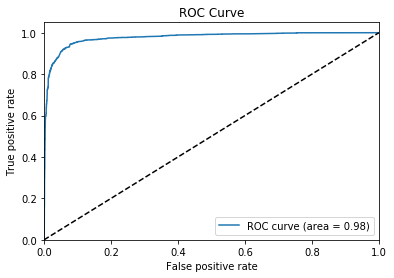

In [106]:
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0,1 ], 'k--')
plt.title("ROC Curve")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc="lower right")
plt.show()

In [107]:
cutoffs= [i/10 for i in range (1,10)]
for i in cutoffs:
    pred[i]=pred.Converted_prob.map(lambda x:1 if x>i else 0)
pred.head()

,Prospect ID,Converted,Converted_prob,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4715,4715,0,0.053037,0,0,0,0,0,0,0,0,0
7132,7132,1,0.987757,1,1,1,1,1,1,1,1,1
8954,8954,0,0.058951,0,0,0,0,0,0,0,0,0
5283,5283,0,0.078332,0,0,0,0,0,0,0,0,0
3003,3003,0,0.442928,1,1,1,1,0,0,0,0,0


In [108]:
cutoffs= [i/10 for i in range (1,10)]
cut = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
for i in cutoffs:
    cm1= confusion_matrix(Y_train,pred[i])
    total = sum(sum(cm1))
    accuracy = (cm1[0,0]+ cm1[1,1])/total
    sens=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    spec=cm1[0][0]/(cm1[0][0]+cm1[0][1])
    cut.loc[i]=[i,accuracy, sens, spec]
print(cut)   

     prob  accuracy     sensi     speci
0.1   0.1  0.880334  0.970612  0.824046
0.2   0.2  0.921150  0.956119  0.899347
0.3   0.3  0.930427  0.944847  0.921436
0.4   0.4  0.933519  0.919887  0.942018
0.5   0.5  0.928726  0.882850  0.957329
0.6   0.6  0.927335  0.865539  0.965863
0.7   0.7  0.925015  0.845008  0.974900
0.8   0.8  0.915894  0.807568  0.983434
0.9   0.9  0.892239  0.738325  0.988203


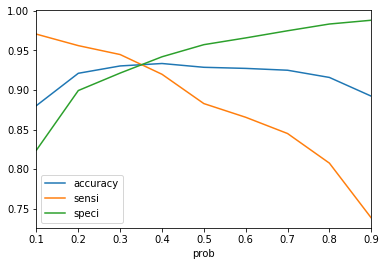

In [109]:
cut.plot.line(x="prob",y=["accuracy","sensi","speci"])
plt.show()

In [110]:
pred['final_predicted'] = pred.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)
pred.head()

,Prospect ID,Converted,Converted_prob,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4715,4715,0,0.053037,0,0,0,0,0,0,0,0,0,0
7132,7132,1,0.987757,1,1,1,1,1,1,1,1,1,1
8954,8954,0,0.058951,0,0,0,0,0,0,0,0,0,0
5283,5283,0,0.078332,0,0,0,0,0,0,0,0,0,0
3003,3003,0,0.442928,1,1,1,1,0,0,0,0,0,1


In [111]:
accuracy_score(pred['Converted'], pred["final_predicted"])

0.9324366110080395

In [112]:
confusionmatrix = confusion_matrix(pred['Converted'], pred["final_predicted"] )
confusionmatrix

array([[3728,  256],
       [ 181, 2303]], dtype=int64)

In [113]:
print("sens",confusionmatrix[1,1]/(confusionmatrix[1,0]+confusionmatrix[1,1]))
print("spec",confusionmatrix[0][0]/(confusionmatrix[0][0]+confusionmatrix[0][1]))

sens 0.927133655394525
spec 0.9357429718875502


### Precision - Recall tradeoff

In [114]:
confusionmatrix = confusion_matrix(Y_train, pred["final_predicted"] )
confusionmatrix

array([[3728,  256],
       [ 181, 2303]], dtype=int64)

In [115]:
##### Precision : TP / TP + FP
confusionmatrix[1,1]/(confusionmatrix[0,1]+confusionmatrix[1,1])

0.8999609222352482

In [116]:
##### Recall : TP / TP + FN

confusionmatrix[1,1]/(confusionmatrix[1,0]+confusionmatrix[1,1])

0.927133655394525

In [117]:
#using sklearn
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [118]:
precision_score(Y_train, pred["final_predicted"])

0.8999609222352482

In [119]:
recall_score(Y_train, pred["final_predicted"])

0.927133655394525

In [120]:
p, r, thresholds = precision_recall_curve(Y_train,pred["Converted_prob"])

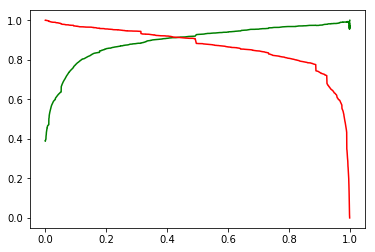

In [121]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [122]:
tcol=X_train_sm.columns

In [123]:
tcol

Index(['Total Time Spent on Website', 'Last Activity_SMS Sent',
       'Occupation_Unknown', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Unknown', 'Tags_Will revert after reading the email',
       'Tags_switched off'],
      dtype='object')

In [124]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [125]:
X_test=X_test[tcol]
X_test.head()

,Total Time Spent on Website,Last Activity_SMS Sent,Occupation_Unknown,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_switched off
4608,0.114182,0,0,0,0,0,1,0,0,0,0,0
7935,0.420933,0,1,1,0,0,0,0,0,1,0,0
4043,0.000906,0,0,1,0,0,0,0,0,1,0,0
7821,0.146353,0,0,0,0,0,0,0,1,0,0,0
856,0.091074,0,1,0,0,0,0,0,0,1,0,0


In [126]:
Y_test.shape


(2772,)

In [127]:
X_test_sm = sm.add_constant(X_test)

In [128]:
ytest_predictions = model4.fit().predict(X_test_sm)
ytest_predictions

4608    0.996002
7935    0.050540
4043    0.179519
7821    0.006990
856     0.071096
927     0.191267
318     0.992560
1018    0.202660
8151    0.012653
1570    0.957563
8086    0.991964
7689    0.992548
5076    0.990152
8752    0.024768
2825    0.003412
1840    0.998738
6157    0.984751
509     0.000258
47      0.012413
620     0.003324
8030    0.924626
668     0.153162
8989    0.980776
2952    0.996407
6851    0.929560
5140    0.003124
1631    0.983387
2191    0.508421
2968    0.003668
8225    0.734149
          ...   
1097    0.001073
548     0.975220
6853    0.110083
3238    0.012413
7637    0.019563
7288    0.990152
2908    0.013138
2314    0.990480
5627    0.005614
5857    0.018840
6615    0.001858
3038    0.013693
6951    0.001866
6659    0.005054
616     0.990363
1118    0.087117
937     0.055918
2572    0.001158
622     0.924626
7087    0.137129
7116    0.733542
8979    0.045157
4240    0.667624
5620    0.105640
7036    0.998704
4184    0.013521
5023    0.019371
6661    0.0030

In [129]:
pred_test = pd.DataFrame({'Prospect ID':Y_test.index,'Converted':Y_test, 'Converted_prob':ytest_predictions})

In [130]:
pred_test['Lead_Score'] = pred_test.Converted_prob.map( lambda x: round(x*100))

In [131]:
pred_test['final_predicted'] = pred_test.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)
pred_test.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_predicted
4608,4608,1,0.996002,100,1
7935,7935,0,0.050540,5,0
4043,4043,0,0.179519,18,0
7821,7821,0,0.006990,1,0
856,856,0,0.071096,7,0


In [132]:
accuracy_score(Y_test,pred_test["final_predicted"])

0.9307359307359307

In [133]:
confusionmatrix = confusion_matrix(pred_test['Converted'], pred_test["final_predicted"] )
confusionmatrix

array([[1584,  111],
       [  81,  996]], dtype=int64)

In [134]:
print("senstivity",confusionmatrix[1,1]/(confusionmatrix[1,0]+confusionmatrix[1,1]))
print("specificity",confusionmatrix[0][0]/(confusionmatrix[0][0]+confusionmatrix[0][1]))

senstivity 0.924791086350975
specificity 0.9345132743362832
